<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/6_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

DNN 모델 생성 및 트레이닝

In [2]:
model = Sequential()
model.add(Dense(4, input_shape=(3,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activatiion='relu'))
model.add(Dense(1,activation='sigmoid'))
#이진분류 모델 생성
model.compile(loss='binary_crossentropy',optimizer='adam', metrics='acc')
#학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

TypeError: ignored

CNN의 구현

Convolutional NN(특징추출) + DNN (카테고리 분류)

In [ ]:
model= Sequential()
model.add(Conv2D(12, kernel_size=(5,5), activation='relu', input_shape=(120,60,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(5,5), acivation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20, kernel_size=(4,4), acivation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))


RNN 순환 신경망

방향을 가지는 엣지 > 히든레이어로 전달 & 옆 노드에게

LSTM

[실습] Python을 활용한 AI 모델링 - 딥러닝 파트

· 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
여기서는 딥러닝 모델 DNN, CNN, RNN 에 대해 코딩하여 모델 구축해 보겠습니다.
한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

학습목차
1. 실습을 위한 KT AIDU 환경변수 설정
2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
* 데이터 가져오기
* 데이터 전처리
* Train, Test 데이터셋 분할
* 데이터 정규화
* 딥러닝 모델:DNN, CNN, RNN

2 딥러닝 모델(DNN, CNN, RNN) 프로세스


1)  라이브러리 임포트(import)    
2) 데이터 가져오기(Loading the data)    
3) 탐색적 데이터 분석(Exploratory Data Analysis)    
4) 데이터 전처리(Data PreProcessing): 데이터타입 변환 Null 데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering)등    
5) Train, Test 데이터셋 분할    
6) 데이터 정규화(Normalizing the Data)    
7) 모델 개발(Creating the Model)    
8) 모델 성능 평가    

1 라이브러리 임포트

In [ ]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

2 데이터 로드

cust data.csv 파일 컬럼명

고객등급(cust_class), 성별(sex_type),나이(age), 사용서비스수(efct_svc_count),
서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
3개월 평균 요금(r3m_avg_bill_amt), A서비스3개월 평균요금(r3m_A_avg_arpu amt), B서비스3개월 평균요금(r3m_B_avg_arpu amt), 해지여부(termination_yn)

In [ ]:
df = pd.read_csv('cust_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        26 non-null     object 
 1   sex          28 non-null     object 
 2   age          30 non-null     int64  
 3   service      30 non-null     int64  
 4   stop         30 non-null     object 
 5   npay         30 non-null     object 
 6   avg_bill     30 non-null     float64
 7   A_bill       30 non-null     float64
 8   B_bill       30 non-null     float64
 9   termination  30 non-null     object 
 10  by_age       30 non-null     int64  
 11  bill_rating  30 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.9+ KB


3 데이터분석

In [ ]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
25,NaN,F,19,0,N,N,2438.70000,2217.0000,0.00000,N,15,low
26,D,F,55,1,N,N,11303.66660,1578.9999,6782.19996,N,55,midhigh
27,G,M,22,2,N,N,15673.79011,1703.3001,12545.60000,N,20,high
28,E,M,58,1,N,N,9604.90685,2033.0001,6698.73340,N,55,mid
29,D,M,53,1,N,Y,1821.60000,1656.0000,0.00000,N,50,low


<Axes: >

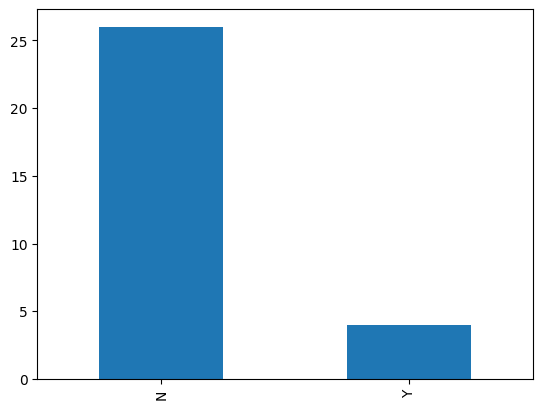

In [ ]:
df['termination'].value_counts().plot(kind='bar')

4 데이터 전처리

Object 컬럼에 대해 Pandas get dummies 함수 활용하여 One-Hot-Encoding

In [ ]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30 non-null     int64  
 1   service              30 non-null     int64  
 2   avg_bill             30 non-null     float64
 3   A_bill               30 non-null     float64
 4   B_bill               30 non-null     float64
 5   by_age               30 non-null     int64  
 6   class_D              30 non-null     uint8  
 7   class_E              30 non-null     uint8  
 8   class_F              30 non-null     uint8  
 9   class_G              30 non-null     uint8  
 10  sex_M                30 non-null     uint8  
 11  npay_Y               30 non-null     uint8  
 12  termination_Y        30 non-null     uint8  
 13  bill_rating_low      30 non-null     uint8  
 14  bill_rating_lowmid   30 non-null     uint8  
 15  bill_rating_mid      30 non-null     uint8

5. Train, Test 데이터셋 분할


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('termination_Y', axis=1).values
y = df1['termination_Y'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=3, stratify=y, random_state=42)

6. 데이터 정규화/스케일링 (normalizing/scaling)

In [ ]:
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,sex_M,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
25,19,0,2438.70000,2217.0000,0.00000,15,0,0,0,0,0,0,0,1,0,0,0
26,55,1,11303.66660,1578.9999,6782.19996,55,1,0,0,0,0,0,0,0,0,0,1
27,22,2,15673.79011,1703.3001,12545.60000,20,0,0,0,1,1,0,0,0,0,0,0
28,58,1,9604.90685,2033.0001,6698.73340,55,0,1,0,0,1,0,0,0,0,1,0
29,53,1,1821.60000,1656.0000,0.00000,50,1,0,0,0,1,1,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:2]

In [ ]:
X_train.shape

7 모델 개발

1) DNN

A. 이진 분류용 DNN laver
* 18개 input layer
* unit 4개 hidden layer
* unit 3개 hidden layer
* 1개 output layser : 이진분류

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
#18개 input layer
#unit 4개 hidden
#unit 3개 hidden
#1개 output

model=Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

모델  확인

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 76        
                                                                 
 dense_16 (Dense)            (None, 3)                 15        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 컴파일 - 이진 분류모델

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* 과적합 방지 : Dropout

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(16,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
  model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 68        
                                                                 
 dropout_9 (Dropout)         (None, 4)                 0         
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
 dropout_10 (Dropout)        (None, 3)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 컴파일 - 이진 분류 모델

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

모델 훈련(학습)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=16)

#데이터가 너무 작아서?  loss도 크고, accuracy는 낮다

Epoch 1/20
2/2 [==============================] - 1s 209ms/step - loss: 0.7827 - accuracy: 0.3704 - val_loss: 0.7382 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.7345 - accuracy: 0.5185 - val_loss: 0.7340 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.7879 - accuracy: 0.3333 - val_loss: 0.7292 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 0s 34ms/step - loss: 0.7333 - accuracy: 0.3704 - val_loss: 0.7245 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 0s 32ms/step - loss: 0.6958 - accuracy: 0.5926 - val_loss: 0.7202 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 0s 32ms/step - loss: 0.7114 - accuracy: 0.7037 - val_loss: 0.7162 - val_accuracy: 0.3333
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.7132 - accuracy: 0.5926 - val_loss: 0.7124 - val_accuracy: 0.3333
Epoch 8/20
2/2 [==========

B. 다중 분류용 DNN layer

* 18 input layer
* unit 5 hidden layer
* dropout
* unit 4 hidden layer
* dropout
* 2개 output layser : 다중분류

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 5)                 95        
                                                                 
 dropout_13 (Dropout)        (None, 5)                 0         
                                                                 
 dense_25 (Dense)            (None, 4)                 24        
                                                                 
 dropout_14 (Dropout)        (None, 4)                 0         
                                                                 
 dense_26 (Dense)            (None, 2)                 10        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 컴파일 - 다중 분류 모델

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델  훈련(학습)하기

In [ ]:
history= model.fit(X_train, y_train,
          validation_data = (X_test,y_test),
          epochs=20,
          batch_size=16)

Epoch 1/20


ValueError: ignored

8 모델 성능평가

* 성능 시각화

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.head()

""


In [ ]:
losses[['']]

2) CNN

· [출처] http://laxar.creteshiestates/convics-wors-aleha/tlt
CNN은 이미지 처리에 높은 성능을 보여주고 있어 DNN에서 다뤄던Tabular 형태의 데이터를 가지고 테스트 진행하기 어려워
따로 이미지 준비하여 CNN 실습을 진행하겠습니다.

In [ ]:
from glob import glob
import tensorflow as tf

In [ ]:
glob(aidu-framework.config.data_dir + '/dataset-clean, dirty.zip')

NameError: ignored